In [1]:
import pandas as pd
df = pd.read_csv('data/weather_data 2.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [3]:
type(df.day[0])

str

#### Convert dates

In [38]:
# in here we can see date is string column
df = pd.read_csv('data/weather_data 2.csv', parse_dates=['day'])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [13]:
type(df.day[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Set df column as index

In [14]:
df.set_index('day', inplace=True)

In [15]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


#### Fill na values

In [37]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.0,Rain
2017-01-04,30.000000,9.0,Sunny
2017-01-05,28.000000,NaN,Snow
2017-01-06,30.000000,7.0,NaN
2017-01-07,32.000000,NaN,Rain
2017-01-08,32.666667,NaN,Sunny
2017-01-09,33.333333,NaN,NaN
2017-01-10,34.000000,8.0,Cloudy
2017-01-11,40.000000,12.0,Sunny


In [23]:
modified_df_NA = df.fillna({
    'event':'No event'
})
modified_df_NA.temperature = modified_df_NA.temperature.fillna(method = 'ffill')
modified_df_NA

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,28.0,7.0,No event
2017-01-07,32.0,NaN,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,32.0,NaN,No event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [24]:
# if you want to copy horisontical value you can use axis parameter equals to columns
# by default if we have to nan columns ffill will copy forwar value to both 
# but if we limit to 1 it will copy one and keep nan as second

 #### Linear values for missing values

In [43]:
interpolate_df = df
interpolate_df = interpolate_df.set_index("day")
interpolate_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [44]:
interpolate_df.temperature = interpolate_df.temperature.interpolate(method="time")
interpolate_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.0,Rain
2017-01-04,29.000000,9.0,Sunny
2017-01-05,28.000000,NaN,Snow
2017-01-06,30.000000,7.0,NaN
2017-01-07,32.000000,NaN,Rain
2017-01-08,32.666667,NaN,Sunny
2017-01-09,33.333333,NaN,NaN
2017-01-10,34.000000,8.0,Cloudy
2017-01-11,40.000000,12.0,Sunny


#### Drop values

In [53]:
df = df.set_index("day")
drop_df = df.dropna(how="all")
drop_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [54]:
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
# we can use thresh parameter for drop columns if we have 1 valid value it keeps if not it drops like wise


#### Replace data advanced

In [56]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/weather_data 3.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [57]:
new_df = df.replace([-99999, -888888],np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [62]:
new_df.event = new_df.event.replace('0',np.NaN)
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [63]:
# if we have column that has 6 kmh etc we can replace using regex
# df = df.replace('[A-Za-z]','',regex=True)

#### How to replace list of values with another list

In [64]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [66]:
new_df = df.replace(['poor','average','good','exceptional'],['F','C','B','A'])
new_df

,score,student
0,A,rob
1,C,maya
2,B,parthiv
3,F,tom
4,C,julian
5,A,erica


#### Group by values

In [67]:
df = pd.read_csv('data/weather_by_cities.csv')
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


1. Find maximum temperature in each city
2. Find average win speed per city

In [69]:
groups = df.groupby('city')
groups

#### THis is how it looks like
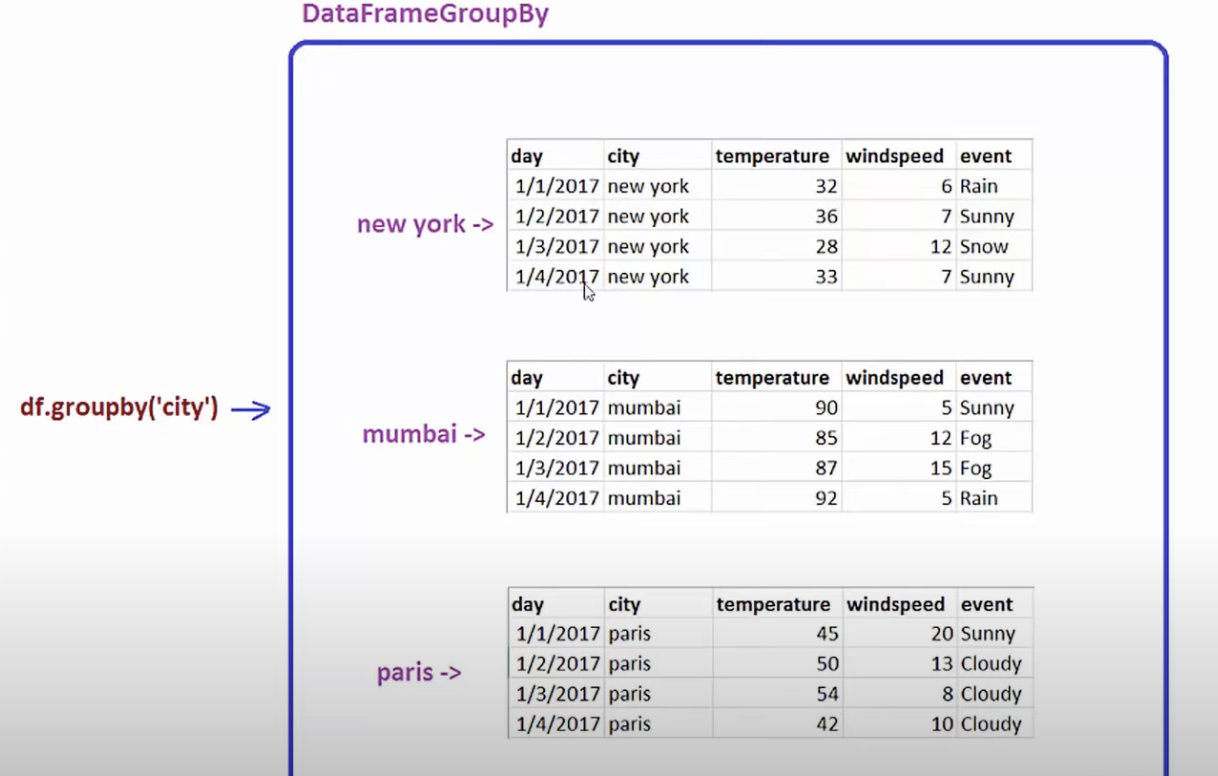

In [70]:
# How to access the df

for city, city_df in groups:
    print(city)
    print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


#### How to get particular df

In [71]:
mumbai_df = groups.get_group('mumbai')
mumbai_df

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [72]:
mumbai_df.temperature.max()

92

In [73]:
groups.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [76]:
groups.windspeed.mean()

city
mumbai       9.25
new york     8.00
paris       12.75
Name: windspeed, dtype: float64

In [77]:
groups.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      AxesSubplot(0.125,0.11;0.775x0.77)
new york    AxesSubplot(0.125,0.11;0.775x0.77)
paris       AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

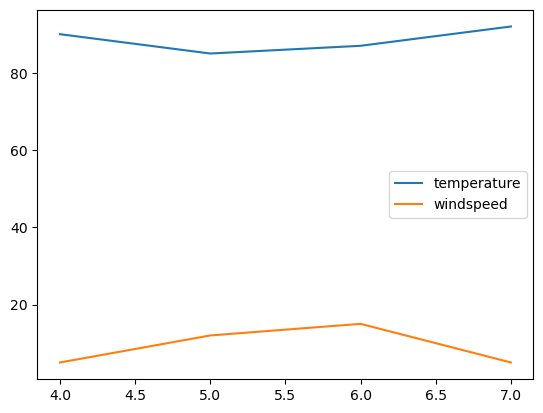

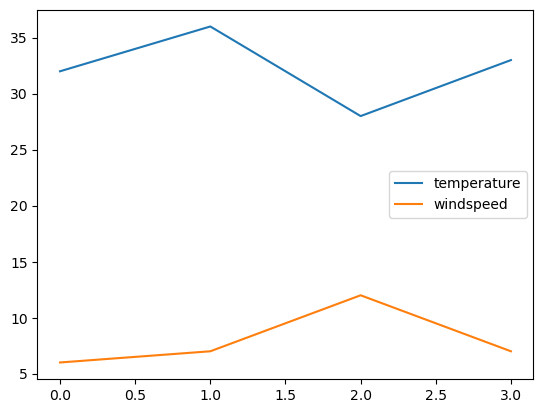

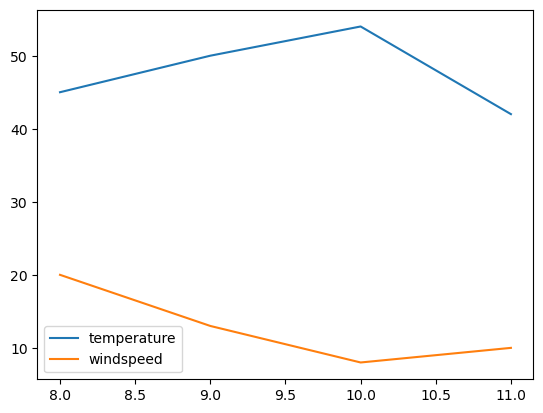

In [78]:
%matplotlib inline
groups.plot()

## Concat df 🥲🥲

In [79]:
import pandas as pd

sl_weather = pd.DataFrame({
    "city": ["colombo","jafna","galle"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
sl_weather

,city,temperature,humidity
0,colombo,32,80
1,jafna,45,60
2,galle,30,78


In [90]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [84]:
df = pd.concat([sl_weather,us_weather],keys=['sl','us'])
df

city  temperature  humidity
sl 0   colombo           32        80
   1     jafna           45        60
   2     galle           30        78
us 0  new york           21        68
   1   chicago           14        65
   2   orlando           35        75

In [85]:
df.loc['sl']

,city,temperature,humidity
0,colombo,32,80
1,jafna,45,60
2,galle,30,78


In [86]:
 us_wind = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "windspeed": [21,14,35]
})
us_wind

,city,windspeed
0,new york,21
1,chicago,14
2,orlando,35


In [91]:
us_weather_modified = pd.concat([us_weather,us_wind], axis=1, )
us_weather_modified

,city,temperature,humidity,city,windspeed
0,new york,21,68,new york,21
1,chicago,14,65,chicago,14
2,orlando,35,75,orlando,35


In [92]:
s = pd.Series(['Humid','Summer','Winter'], name = "season")
s

0     Humid
1    Summer
2    Winter
Name: season, dtype: object

In [93]:
new_df = pd.concat([us_weather,s],axis=1)
new_df

,city,temperature,humidity,season
0,new york,21,68,Humid
1,chicago,14,65,Summer
2,orlando,35,75,Winter


### MERGE DF 😁

In [94]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [95]:
us_wind = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "windspeed": [21,14,35]
})
us_wind

,city,windspeed
0,new york,21
1,chicago,14
2,orlando,35


In [98]:
df = pd.merge(us_weather,us_wind, on='city',indicator=True)
df

,city,temperature,humidity,windspeed,_merge
0,new york,21,68,21,both
1,chicago,14,65,14,both
2,orlando,35,75,35,both


#### if we need to join outer we can use how=outer, how='left' etc